# Prediction And Error Measurement

In [1]:
import pandas as pd

In [3]:
matches = pd.read_csv("cleaned_data2.csv")
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1928 non-null   int64 
 1   innings       1928 non-null   int64 
 2   BattingTeam   1928 non-null   object
 3   TotalRuns     1928 non-null   int64 
 4   Team1         1928 non-null   object
 5   Team2         1928 non-null   object
 6   Venue         1928 non-null   object
 7   TossWinner    1928 non-null   object
 8   TossDecision  1928 non-null   object
 9   WinningTeam   1922 non-null   object
 10  Team1Players  1928 non-null   object
 11  Team2Players  1928 non-null   object
dtypes: int64(3), object(9)
memory usage: 180.9+ KB


In [14]:
features = ['Team1', 'Team2', 'Venue']
labels = ['TotalRuns']

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Cleaning the data and transforming text into numbers
data = matches[features+labels]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit(data[features])
data.loc[:, features] = encoder.transform(data[features])

C:\Users\tusha\AppData\Local\Temp\ipykernel_18936\3528683128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, features] = encoder.transform(data[features])


In [23]:
data.describe()

,Team1,Team2,Venue,TotalRuns
count,1928.000000,1928.000000,1928.000000,1928.000000
mean,8.531639,8.669087,25.328838,153.577282
std,5.615517,5.487395,13.938621,35.879740
min,0.000000,0.000000,0.000000,2.000000
25%,3.000000,3.000000,13.000000,136.000000
50%,8.000000,8.000000,23.000000,157.000000
75%,13.000000,13.000000,38.000000,176.000000
max,17.000000,17.000000,48.000000,263.000000


array([[<AxesSubplot:title={'center':'Team1'}>,
        <AxesSubplot:title={'center':'Team2'}>],
       [<AxesSubplot:title={'center':'Venue'}>,
        <AxesSubplot:title={'center':'TotalRuns'}>]], dtype=object)

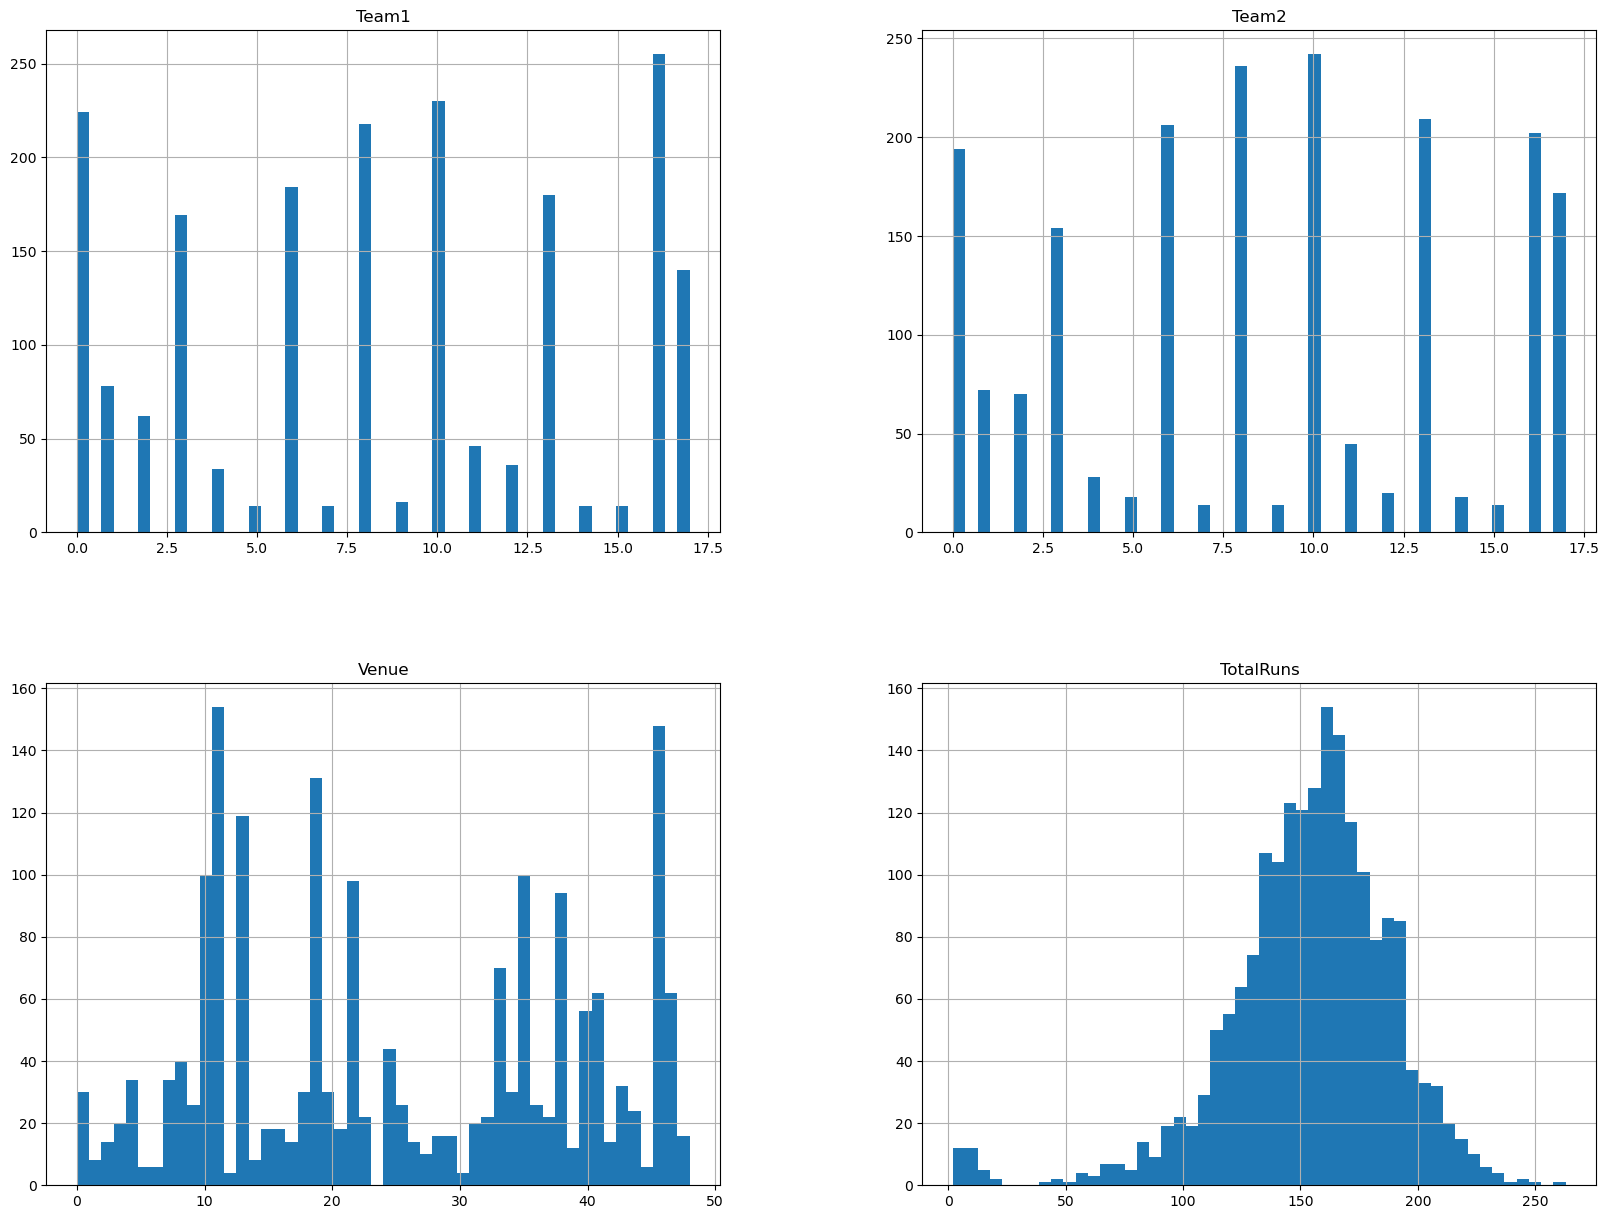

In [26]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 15))

In [31]:
data[data['TotalRuns']>200]

,Team1,Team2,Venue,TotalRuns
0,16.0,8.0,19.0,222
2,6.0,0.0,33.0,240
3,6.0,0.0,33.0,207
14,0.0,10.0,22.0,208
15,0.0,10.0,22.0,202
...,...,...,...,...
1888,0.0,2.0,8.0,208
1898,12.0,16.0,4.0,209
1910,9.0,8.0,8.0,210
1911,9.0,8.0,8.0,208


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Venue"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [25]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 764 to 940
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team1      1542 non-null   float64
 1   Team2      1542 non-null   float64
 2   Venue      1542 non-null   float64
 3   TotalRuns  1542 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 60.2 KB


In [34]:
# Looking for correlation

corr_matrix = strat_train_set.corr()
corr_matrix["TotalRuns"].sort_values(ascending=False)

TotalRuns    1.000000
Team2       -0.001874
Venue       -0.014801
Team1       -0.042266
Name: TotalRuns, dtype: float64

array([[<AxesSubplot:xlabel='TotalRuns', ylabel='TotalRuns'>,
        <AxesSubplot:xlabel='Team1', ylabel='TotalRuns'>,
        <AxesSubplot:xlabel='Team2', ylabel='TotalRuns'>,
        <AxesSubplot:xlabel='Venue', ylabel='TotalRuns'>],
       [<AxesSubplot:xlabel='TotalRuns', ylabel='Team1'>,
        <AxesSubplot:xlabel='Team1', ylabel='Team1'>,
        <AxesSubplot:xlabel='Team2', ylabel='Team1'>,
        <AxesSubplot:xlabel='Venue', ylabel='Team1'>],
       [<AxesSubplot:xlabel='TotalRuns', ylabel='Team2'>,
        <AxesSubplot:xlabel='Team1', ylabel='Team2'>,
        <AxesSubplot:xlabel='Team2', ylabel='Team2'>,
        <AxesSubplot:xlabel='Venue', ylabel='Team2'>],
       [<AxesSubplot:xlabel='TotalRuns', ylabel='Venue'>,
        <AxesSubplot:xlabel='Team1', ylabel='Venue'>,
        <AxesSubplot:xlabel='Team2', ylabel='Venue'>,
        <AxesSubplot:xlabel='Venue', ylabel='Venue'>]], dtype=object)

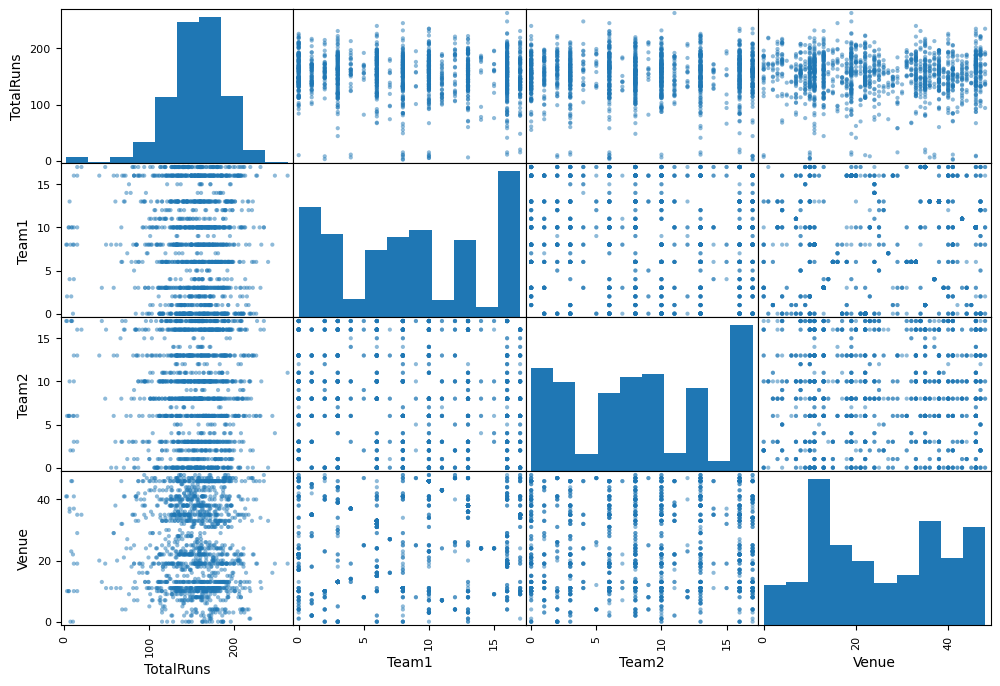

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["TotalRuns", "Team1", "Team2", "Venue"]
scatter_matrix(strat_train_set[attributes], figsize=(12, 8))

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Prediction

model = linear_model.LinearRegression()

match_X_train = strat_train_set[features]
match_y_train = strat_train_set[labels[0]]

model.fit(match_X_train, match_y_train)

match_y_predicted = model.predict(strat_test_set[features])

match_y_test = strat_test_set[labels[0]]

print("Mean squared error is: ", mean_squared_error(match_y_test, match_y_predicted))

Mean squared error is:  1380.8866497243723


In [41]:
print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

Weights:  [-0.26247782 -0.03807049 -0.02386382]
Intercept:  156.80040888858036


In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Training the classifiers
clf = KNeighborsClassifier()
clf.fit(match_X_train, match_y_train)

match_y_preds = clf.predict(strat_test_set[features])

print("Mean squared error is: ", mean_squared_error(match_y_test, match_y_preds))

Mean squared error is:  3209.8316062176164


C:\D_Drive\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
from sklearn import tree

clf2 = tree.DecisionTreeClassifier()
clf2.fit(match_X_train, match_y_train)

match_y_preds2 = clf2.predict(strat_test_set[features])
print("Mean squared error is: ", mean_squared_error(match_y_test, match_y_preds2))

Mean squared error is:  2262.665803108808


In [49]:
from sklearn import tree

clf3 = tree.DecisionTreeRegressor()
clf3.fit(match_X_train, match_y_train)

match_y_preds3 = clf3.predict(strat_test_set[features])
print("Mean squared error is: ", mean_squared_error(match_y_test, match_y_preds3))

Mean squared error is:  1350.0026056395686


In [83]:
from sklearn.ensemble import RandomForestRegressor

clf4 = RandomForestRegressor(n_estimators=10)
clf4.fit(match_X_train, match_y_train)

match_y_preds4 = clf4.predict(strat_test_set[features])
print("Mean squared error is: ", mean_squared_error(match_y_test, match_y_preds4))

Mean squared error is:  1347.1764826547503


In [113]:
from sklearn.ensemble import ExtraTreesRegressor

clf5 = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf5.fit(match_X_train, match_y_train)

match_y_preds5 = clf5.predict(strat_test_set[features])
print("Mean squared error is: ", mean_squared_error(match_y_test, match_y_preds5))

Mean squared error is:  1318.4840584995432


ValueError: x and y must be the same size

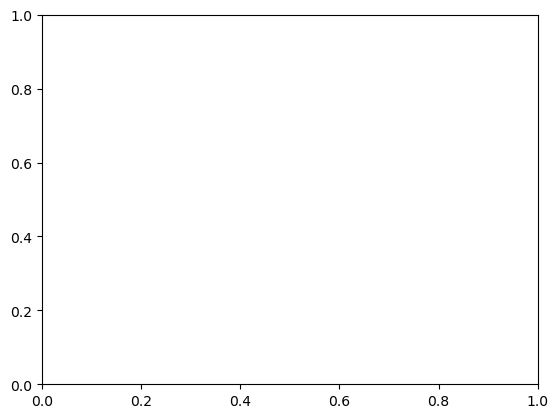

In [45]:
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.plot(diabetes_X_test, diabetes_Y_predicted)
plt.show()

match_X_test = strat_test_set[features]
plt.scatter(match_X_test, match_y_test)
#plt.plot(match_X_test, match_y_predicted)
plt.show()